#Pokemon EDA

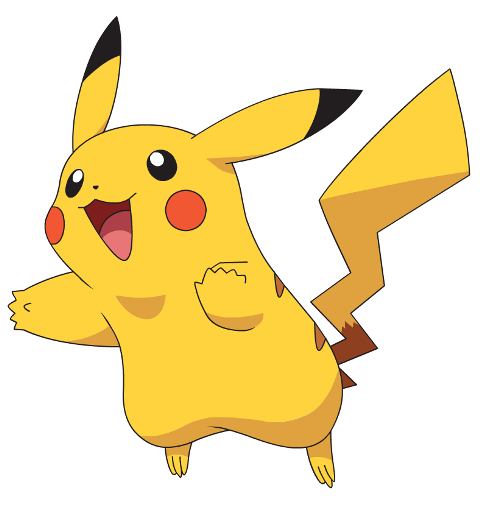

Ссылка на датасет в kaggle: https://www.kaggle.com/datasets/abcsds/pokemon

В изучаемом датасете «Pokemon with stats» находится информация обо всех известных на 2016 год покемонах. Этот набор данных включает в себя 800 строк (721 уникальных покемонов), а также их основные характеристики:

Идентификатор покемона, имя покемона, класс покемона, дополнительный класс покемона, сумма по всем числовым характеристикам покемона, очки здоровья покемона, сила атаки покемона, очки защиты покемона, сила специальной атаки покемона, сила защиты от специальных атак, скорость покемона, номер поколения покемона, принадлежность покемона к легендарным.






In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import scipy.stats as ss
sns.set_style('darkgrid')

import warnings
warnings.filterwarnings('ignore') #to hide pandas warnings

In [3]:
url='https://kodomo.fbb.msu.ru/~varyaaas/term4/files/Pokemon.csv'
df = pd.read_csv(url)
df

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,719,Diancie,Rock,Fairy,600,50,100,150,100,150,50,6,True
796,719,DiancieMega Diancie,Rock,Fairy,700,50,160,110,160,110,110,6,True
797,720,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,6,True
798,720,HoopaHoopa Unbound,Psychic,Dark,680,80,160,60,170,130,80,6,True


## Характеристики числовых данных


На рисунках представлены визуализации распределений и характеристики данных изучаемого датасета. Большинство выбросов в боксплотах соответствует легендарным покемонам, обладающим повышенными характеристиками по сравнению с обычными покемонами.


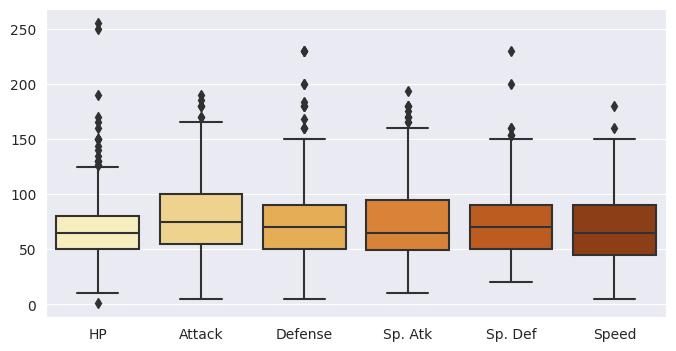

In [5]:
plt.figure(figsize=(8, 4), dpi=100)
pkmn = df.drop(['Generation', 'Legendary'],1)
pkmn = pkmn.drop(['Total', '#'],1)
sns.boxplot(data=pkmn, palette="YlOrBr")
plt.savefig('1.png')

1 и 5 поколения покемоны наиболее представлены в датасете, наименьшее количество покемонов содержит 6ое поколение.

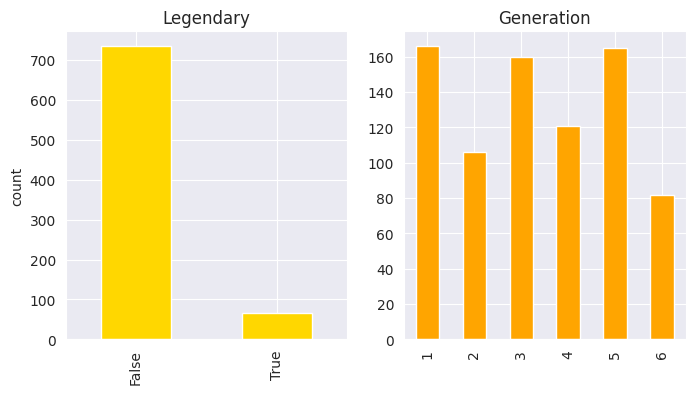

<Figure size 600x500 with 0 Axes>

In [3]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (8, 4))
plt.figure(figsize=(6, 5), dpi=100)
poc_category = df.Legendary.value_counts()
poc_category.plot.bar(color = 'gold', ax = ax1)
ax1.set_title('Legendary')
ax1.set(ylabel='count')

poc_gen = df.Generation.value_counts().sort_index()
poc_gen.plot.bar(color = 'orange', ax = ax2)
ax2.set_title('Generation')
plt.draw()
fig.savefig('2.png', dpi=100)
plt.show()

## Сравнение легендарных и обычных покемонов

Легендарные покемоны обладают намного более высокими показателями атаки и защиты в сравнении с обычными покемонами, поэтому их редкость является способом сохранения баланса в игре (рисунок выше).

Построим 95-процентный доверительный интервал для процента легендарных покемонов. Для этого возьмём из файла 100 случайных строчек (создадим мини-выборку) и будем строить интервал на ней.

$$parameter = estimator ± critical\ value * standart\ error$$

$$parameter = p,\ estimator = \hat{p} = 0.07$$

$$SE = \sqrt{\frac{\hat{p}(1-\hat{p})}{n}}$$




**Интервал равен: $[0,0197; 0,1203]$**

*Интерпретация доверительного интервала:* если провести большое количество независимых испытаний с аналогичным построением доверительного интервала, то в 95% случаях такой интервал будет содержать истинную долю легендарных покемонов, а в остальных 5% случаях - нет.

In [4]:
df.sample(n = 100, random_state = 42).Legendary.value_counts()

False    93
True      7
Name: Legendary, dtype: int64

На рисунке представлены распределения основных характеристик легендарных и обычных покемонов, основываясь на них можно также предположить различие этих покемонов.

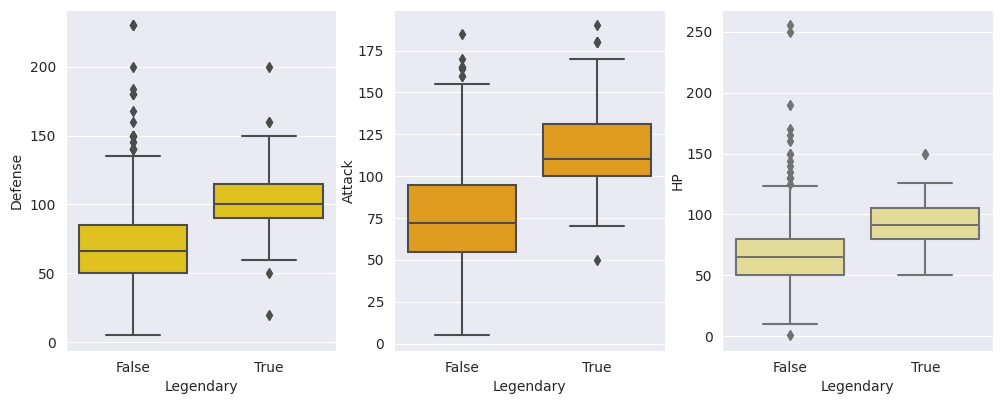

In [51]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (10, 4))
fig.tight_layout()
sns.boxplot(data = df, y = 'Defense', x = 'Legendary', color = 'gold', ax = ax1)
ax2.get_yaxis().set_label_coords(-0.14,0.3)
sns.boxplot(data = df, y = 'Attack', x = 'Legendary', color = 'orange', ax = ax2)
ax3.get_yaxis().set_label_coords(-0.14,0.3)
sns.boxplot(data = df, y = 'HP', x = 'Legendary', color = 'khaki', ax = ax3)
plt.draw()
plt.savefig('3.png')

Для проверки этого факта, основываясь на центральной предельной теореме, был применен односторонний z-тест на разность средних к основным характеристикам покемонов: HP, Attack и Defense.

$H_0: \mu_1 = \mu_2$

$H_1: \mu_1 > \mu_2$

$$test\ statistic = \frac{estimator - parameter}{SE}$$

$$estimator = \bar{X_1} - \bar{X_2},\ SE = \sqrt{\frac{\sigma_1^2}{n_1} + \frac{\sigma_2^2}{n_2}}$$

К полученным p-value была применена поправка Бонферрони на множественное тестирование.

Эта одношаговая процедура позволяет снизить вероятность ложноположительного результата эксперимента. Суть метода — принять альтернативную гипотезу, если:

$$p ≥ \frac{\alpha}{n}, $$


где $n$ — количество тестируемых гипотез.

In [16]:
print(df.groupby('Legendary')['HP'].describe())
print(df.groupby('Legendary')['Defense'].describe())
print(df.groupby('Legendary')['Attack'].describe())

           count       mean        std   min   25%   50%    75%    max
Legendary                                                             
False      735.0  67.182313  24.808849   1.0  50.0  65.0   79.5  255.0
True        65.0  92.738462  21.722164  50.0  80.0  91.0  105.0  150.0
           count       mean        std   min   25%    50%    75%    max
Legendary                                                              
False      735.0  71.559184  30.408194   5.0  50.0   66.0   85.0  230.0
True        65.0  99.661538  28.255131  20.0  90.0  100.0  115.0  200.0
           count        mean        std   min    25%    50%    75%    max
Legendary                                                                
False      735.0   75.669388  30.490153   5.0   54.5   72.0   95.0  185.0
True        65.0  116.676923  30.348037  50.0  100.0  110.0  131.0  190.0


In [27]:
#statsmodels.stats.weightstats.ztest would be easier

hp = (92.738462 - 67.182313) / ((((24.808849 ** 2) / 735) + ((21.722164 ** 2) / 65)) ** 0.5)
print(f'z = {hp}, p-value = {ss.norm.sf(hp)}, adjusted p-value = {(ss.norm.sf(hp)) * 3}')

defs = (99.661538  - 71.559184) / ((((30.408194 ** 2) / 735) + ((28.255131 ** 2) / 65)) ** 0.5)
print(f'z = {defs}, p-value = {ss.norm.sf(defs)}, adjusted p-value = {(ss.norm.sf(defs)) * 3}')


att = (116.676923 - 75.669388) / ((((30.490153 ** 2) / 735) + ((30.348037 ** 2) / 65)) ** 0.5)
print(f'z = {att}, p-value = {ss.norm.sf(att)}, adjusted p-value = {(ss.norm.sf(att)) * 3}')

z = 8.981370569036434, p-value = 1.337072775782841e-19, adjusted p-value = 4.011218327348523e-19
z = 7.637077852299397, p-value = 1.1110357529773475e-14, adjusted p-value = 3.3331072589320424e-14
z = 10.438133525957143, p-value = 8.302161080155425e-26, adjusted p-value = 2.4906483240466277e-25


Для всех трех характеристик мы принимаем $H_1$ о разности средних $(\alpha = 0.05)$, что говорит о преимуществе легендарных покемонов.

На основании статей по гейм-дизайну и игровому балансу, я предположила, что очки здоровья и очки атаки должны быть каким-то образом связаны. Логично, что если у покемона высокий урон, то для сохранения игрового баланса, ему нужно дать меньше очков здоровья и наоборот.

Соответственно, ожидалась обратная зависимость здоровья от атаки. На рисунке ниже представлена диаграмма рассеяния. Обратной зависимости не наблюдается, но можно заметить прямую зависимость.



r = 0.422386028776223
R = 0.17840995730534828


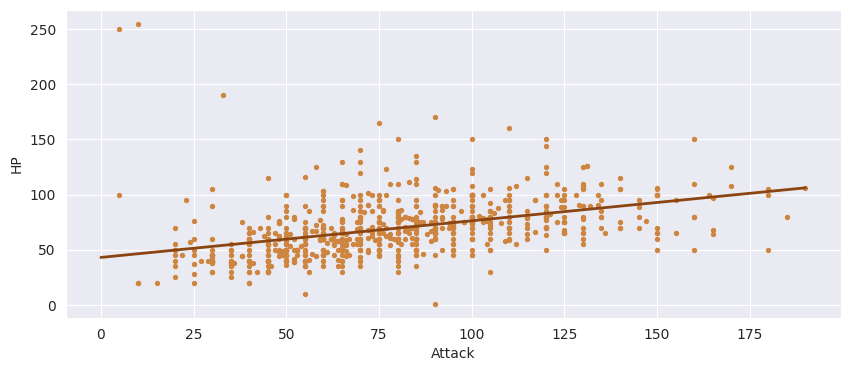

In [24]:
print(f"r = {df['HP'].corr(df['Attack'], method='pearson')}")
print(f"R = {(df['HP'].corr(df['Attack'], method='pearson')) ** 2}")
x = np.linspace(0,190,1000)
y = 0.332297 * x + 43

plt.figure(figsize=(10, 4), dpi=100)
plt.scatter(df.Attack, df.HP, color='peru', s = 8)
plt.plot(x, y, color='saddlebrown', lw = 2)
plt.xlabel('Attack')
plt.ylabel('HP')
plt.show()

In [13]:
ss.linregress(df['Attack'], df['HP'])

LinregressResult(slope=0.3322970660049009, intercept=43.00686641428033, rvalue=0.42238602877622305, pvalue=5.888974358311474e-36, stderr=0.025243123961179944, intercept_stderr=2.1557925295145774)

<Axes: xlabel='Attack', ylabel='Type 1'>

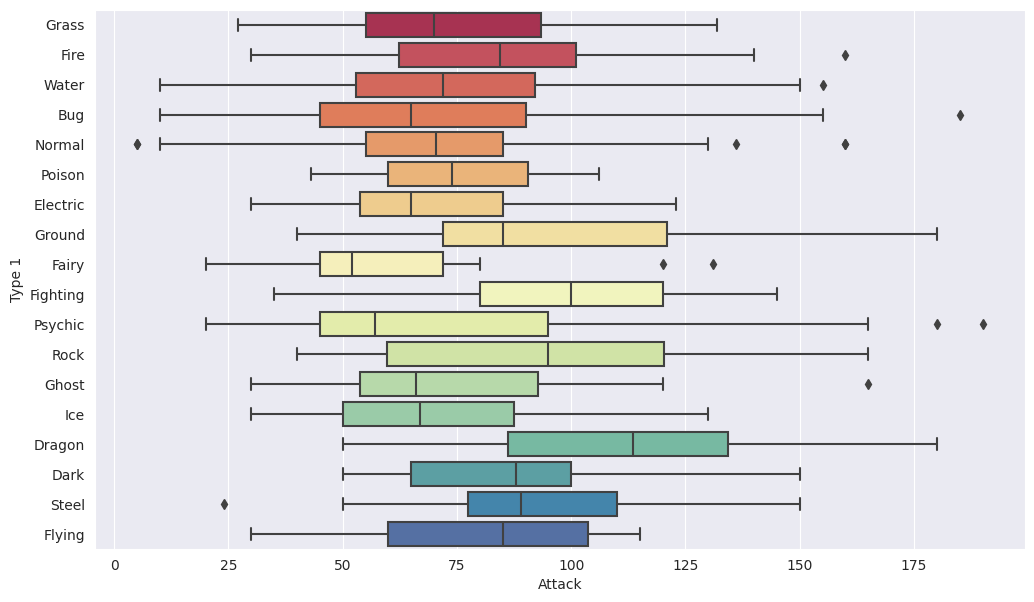

In [17]:

plt.figure(figsize=(12, 7), dpi=100)
sns.boxplot(data = df, y = 'Type 1', x = 'Attack', palette = "Spectral")

In [52]:
df.groupby('Legendary').mean()

,#,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
Legendary,,,,,,,,,
False,353.315646,417.213605,67.182313,75.669388,71.559184,68.454422,68.892517,65.455782,3.284354
True,470.215385,637.384615,92.738462,116.676923,99.661538,122.184615,105.938462,100.184615,3.769231


In [5]:
df.groupby('Type 1').mean()

,#,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
Type 1,,,,,,,,,,
Bug,334.492754,378.927536,56.884058,70.971014,70.724638,53.869565,64.797101,61.681159,3.217391,0.000000
Dark,461.354839,445.741935,66.806452,88.387097,70.225806,74.645161,69.516129,76.161290,4.032258,0.064516
Dragon,474.375000,550.531250,83.312500,112.125000,86.375000,96.843750,88.843750,83.031250,3.875000,0.375000
Electric,363.500000,443.409091,59.795455,69.090909,66.295455,90.022727,73.704545,84.500000,3.272727,0.090909
Fairy,449.529412,413.176471,74.117647,61.529412,65.705882,78.529412,84.705882,48.588235,4.117647,0.058824
Fighting,363.851852,416.444444,69.851852,96.777778,65.925926,53.111111,64.703704,66.074074,3.370370,0.000000
Fire,327.403846,458.076923,69.903846,84.769231,67.769231,88.980769,72.211538,74.442308,3.211538,0.096154
Flying,677.750000,485.000000,70.750000,78.750000,66.250000,94.250000,72.500000,102.500000,5.500000,0.500000
Ghost,486.500000,439.562500,64.437500,73.781250,81.187500,79.343750,76.468750,64.343750,4.187500,0.062500


In [13]:
leg.iloc[1]['count']

65.0

In [60]:
ss.mannwhitneyu(df[df['Legendary'] == True]['Defense'], df[df['Legendary'] == False]['Defense'])

MannwhitneyuResult(statistic=37418.5, pvalue=3.390882856434108e-14)

In [61]:
ss.mannwhitneyu(df[df['Legendary'] == True]['Attack'], df[df['Legendary'] == False]['Attack'])

MannwhitneyuResult(statistic=39868.0, pvalue=3.4625666210159153e-19)

In [62]:
ss.mannwhitneyu(df[df['Legendary'] == True]['HP'], df[df['Legendary'] == False]['HP'])

MannwhitneyuResult(statistic=38778.0, pvalue=6.93110816444599e-17)

In [8]:
ss.mannwhitneyu(df[df['Legendary'] == True]['HP'], df[df['Legendary'] == False]['HP'])

6.93110816444599e-17

In [15]:
drag = df[df['Type 1'] == 'Dragon']['Attack']
lst = list(df['Type 1'].value_counts().index.values)
ls = []
for elem in lst:
  tmp = df[df['Type 1'] == elem]['Attack']
  res = ss.mannwhitneyu(tmp, drag, use_continuity=False)[1]
  ls.append(res)
  print(elem,res)

Water 1.8912584587671477e-07
Normal 2.531575549400478e-07
Grass 4.0616867046942914e-07
Bug 1.3573233943223264e-06
Psychic 4.431061606691738e-06
Fire 0.0005472293303888837
Electric 1.7502083712954393e-07
Rock 0.029319259640683156
Dragon 1.0
Ground 0.052101697261262674
Ghost 1.9153677896690226e-05
Dark 0.006146411202469397
Poison 2.7103669814117407e-05
Steel 0.045957204322990414
Fighting 0.1276334400678182
Ice 4.3366990871784876e-05
Fairy 1.6363095814140475e-05
Flying 0.11222626173165934


In [16]:
drag = df[df['Type 1'] == 'Dragon']['Attack']
lst = list(df['Type 1'].value_counts().index.values)
ls = []
for elem in lst:
  tmp = df[df['Type 1'] == elem]['Attack']
  res = ss.ttest_ind(tmp, drag, equal_var=False)[1]
  ls.append(res)
  print(elem,res)


Water 6.358909995337566e-07
Normal 5.56113332636217e-07
Grass 4.909166556385391e-07
Bug 6.007496363082642e-07
Psychic 3.983748565950477e-06
Fire 0.0003364178385303949
Electric 9.512547045871687e-08
Rock 0.01869403806751308
Dragon 1.0
Ground 0.054385494831734084
Ghost 9.551839208030374e-06
Dark 0.00262974943022027
Poison 2.2540297649279355e-06
Steel 0.023678070428696983
Fighting 0.06244978821724712
Ice 1.2025133177953756e-05
Fairy 4.168967917137989e-06
Flying 0.17223041370729597
